### A problematic integral in lifting line theory

The lifting line theory assumes that the profile of lifting forces $\Gamma(y)$ along the span of the wing of wingspan $b$, aligned with the $y$-axis from $y=-b/2$ to $y=b/2$, generates a sheet of line vortices emerging from the trailing edge of the wing whose induced airflows can be summed to give the global pattern of two counter-vortices at the wing tips so that the air between them is in a downwash of velocity $U(y)$.  

The induced airflow of each line vortex (parallel to the $x$-axis, perpendicular to the span $y$-axis) at position $y_0$ as experienced at position $y$ is, by the simplest theory of fluid dynamics, proportional to $-1/(y-y_0)$.  That is, the airflow is downwards to the positive side of $y_0$ and upwards to the negative side of each vortex.  

If we face this trailing edge of the wing (looking along the $x$-axis in the negative direction towards the front of the aircraft), and the vortices on the left (the negative $y$ side) spin clockwise and the vortices on the right spin counter-clockwise, then the sum of the airflows will create a general downflow of air along the wing span between the wing tips. 

$$U(y) = -\frac{1}{4\pi}\int_{-b/2}^{b/2}\frac{d\Gamma(y_0)}{dy_0}\frac{1}{y - y_0} dy_0$$

This is given in Equation (12.43) of section 12.5 (Prandtl's equation of finite wing theory) in [AA200_Ch_12_Wings_of_Finite_Span_Cantwell](https://web.stanford.edu/~cantwell/AA200_Course_Material/AA200_Course_Notes/AA200_Ch_12_Wings_of_Finite_Span_Cantwell.pdf).  The problem is that it is a sum over a singularity when $y_0 = y$ so the fundamental theorem of calculus does not apply.

While the lifting force function $\Gamma(y)$ does not need to be symmetric, but must go to zero at the wing tips.  In other words $\Gamma(-b/2) = \Gamma(b/2) = 0$

### A constant downwash velocity is the most efficient

In order for the wing to be flying and not be accelerating downwards, the momentum of the air in the downwash needs to equal the weight of the aircraft's mass under the influence of gravity.  

Now, this downwash of air represents an unavoidable expense of kinetic energy, which a glider will must to obtain through a loss of potential energy by descending towards the ground.  It is also -- according to the theory -- responsible for the "induced angle of attack" owing to the notion that each section of the wing is flying in a downwash made by all other parts of the wing.  

Suppose that the wing span is $b$ (along the $y$-axis), the velocity of the downwash (in the $-z$ direction) is $U(y)$, with $-b/2 < y < b/2$, then the momentum per second of this downwash is: 
 $$\int_{-b/2}^{b/2} \rho A U(y) dy $$
where $\rho$ is the air density and $A$ is the area thickness of the cross-sectional sheet on which the downwash is imparted.  Think of it as the height of the envelope of air above and below the wing that forms part of the downwash times the forward velocity of the aircraft.  Its units are square metres per second, so that the total volume of the downwash (in this idealized case) is $Ab$ cubic metres per second.  

(There is no reason to assume that the thickness of or downwash within the envelope is constant, but assume it for now.) 

Accordingly, the kinetic energy lost to this downwash is:
 $$\int_{-b/2}^{b/2} \frac{\rho A}{2} U(y)^2 dy $$

Of all the possible downwash profiles along the wing, the one with the greatest efficiency (least value for kinetic energy) for a given lift force (momentum per second) $Mg$ (aircraft mass $M$, gravitational acceleration $g$) is the constant profile:
 $$U(y) = \frac{Mg}{b\rho A}$$

The kinetic energy embodied by this constant velocity downwash is: 
  $$b \frac{\rho A}{2} \frac{M^2 g^2}{b^2 \rho^2 A^2} = \frac{M^2 g^2}{2 b \rho A}$$
This represents the potential energy of a distance 
  $$\frac{M g}{2 b \rho A}$$
in the vertical direction, which is the absolute minimum sink rate for a glider given these parameters.  This checks out if you compare the units.  

For my hang-glider, the total mass of 100kg, $g=10$, forward velocity 15 m/s, air density is 1 m/s, wing span 10 m/s and wildly guess an envelope thickness of 3 m, then the sink rate must exceed 1.11 m/s.  

### An elliptic lift distribution generates a constant downwash velocity along the wing

Refer to section 12.6 of 
The task is to prove that [AA200_Ch_12_Wings_of_Finite_Span_Cantwell](https://web.stanford.edu/~cantwell/AA200_Course_Material/AA200_Course_Notes/AA200_Ch_12_Wings_of_Finite_Span_Cantwell.pdf) which seeks to prove that the downwash velocity on a wing with an elliptic lift distribution is constant.

![elliptic lift](ellipticlift.png)

We now use SymPy, which is a mathematical symbolic manipulator, to make sure there are no trivial mistakes in the equations.

We write Equation (12.43) as:


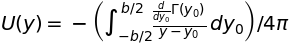

In [52]:
import sympy as sp
sp.init_printing()
from IPython.display import display
Gamma0, b = sp.symbols("Gamma_0 b", real=True, positive=True)
y, y0 = sp.symbols("y y_0", real=True)
Gammafunc = sp.Function("Gamma")(y)
Ufunc = sp.Function("U")(y)
Gammafuncdiff = sp.diff(Gammafunc, y).subs(y, y0)
GG = sp.Function("Gamma_G")(y0)
UexprGG = -1/(4*sp.pi) * sp.integrate(GG/(y - y0), (y0, -b/2, b/2))
Uexpr = UexprGG.subs(GG, Gammafuncdiff)

print("We write Equation (12.43) as:")
display(sp.Eq(Ufunc, Uexpr))


And assign the elliptical lift distibution in Equation (12.53) like so:


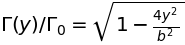

In [42]:
Gammaexp = Gamma0*sp.sqrt(1 - (2*y/b)**2)
print("And assign the elliptical lift distibution in Equation (12.53) like so:")
display(sp.Eq(Gammafunc/Gamma0, Gammaexp/Gamma0))

Therefore:


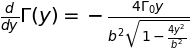

In [50]:
print("Therefore:")
display(sp.Eq(sp.diff(Gammafunc),  sp.diff(Gammaexp, y)))


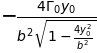

In [84]:
sp.diff(Gammaexp, y).subs(y, y0)

Substituting this elliptical lift distribution into the equation gives:


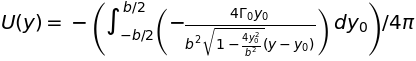

This is equivalent to Equation (12.56)


In [85]:
print("Substituting this elliptical lift distribution into the equation gives:")
Uexpre = UexprGG.subs(GG, sp.diff(Gammaexp, y).subs(y, y0))
display(sp.Eq(Ufunc, Uexpre))
print("This is equivalent to Equation (12.56)")

In [98]:
theta, theta0 = sp.symbols("theta theta_0")
yexp = b*sp.sin(theta)/2
y0exp = b*sp.sin(theta0)/2
print("by substituting:")
display(sp.Eq(y, yexp))
display(sp.Eq(y0, y0exp))


by substituting:


This gives us the same equation as (12.57):


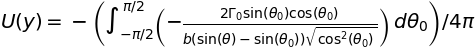

In [99]:
GGt = sp.Function("Gamma_G")(theta0)
Gammaexpdiff = sp.diff(Gammaexp, y).subs(y, y0exp).simplify()
UexprGGt = -1/(4*sp.pi) * sp.integrate(GGt/(yexp - y0exp) * y0exp.diff(theta0), (theta0, -sp.pi/2, sp.pi/2))
UexprGGts = UexprGGt.subs(GGt, Gammaexpdiff)
print("This gives us the same equation as (12.57):")
display(sp.Eq(Ufunc, UexprGGts))


It is difficult to transform this by fair use of sympy, so we
simply have to rewrite it as Equation (12.58):


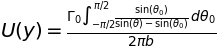

In [107]:
print("It is difficult to transform this by fair use of sympy, so we")
print("simply have to rewrite it as Equation (12.58):")
Uexprhgrand = sp.Function("U_g")(theta0)
Uexprhgrandexp = sp.sin(theta0)/(sp.sin(theta) - sp.sin(theta0))
Uexprh = Gamma0/(2*sp.pi*b) * sp.integrate(Uexprhgrand, (theta0, -sp.pi/2, sp.pi/2)).subs(Uexprhgrand, Uexprhgrandexp)
sp.Eq(Ufunc, Uexprh)


Now, according to Equation (12.59) the integral should be:


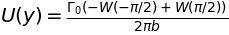

where:


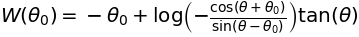

resulting in Equation (12.60)


In [136]:
print("Now, according to Equation (12.59) the integral should be:")
Wfunc = sp.Function("W")
display(sp.Eq(Ufunc, Gamma0/(2*sp.pi*b)*(Wfunc(sp.pi/2) - Wfunc(-sp.pi/2))))
print("where:")
Wexpr = -theta0 + sp.tan(theta)*sp.log(sp.cos(theta0 + theta)/sp.sin(theta0 - theta))
display(sp.Eq(Wfunc(theta0), Wexpr))
print("resulting in Equation (12.60)")
display(sp.Eq(Wfunc(theta0), Gamma0/(2*sp.pi*b)*(Wexpr.subs(theta0, sp.pi/2) - Wexpr.subs(theta0, -sp.pi/2))))


Here is the actual text from the book:
![elliptic lift bad integral](ellipticliftbadintegral.png)

The problem is that it does not seem to be so, because


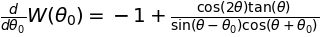

does not appear to correspond with the integrand:


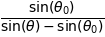

In [144]:
print("The problem is that it is not so, because")
display(sp.Eq(sp.diff(Wfunc(theta0), theta0), sp.diff(Wexpr, theta0).simplify()))
print("does not match the integrand:")
display(Uexprhgrandexp)

From the other notebook [integrate sin by sin plus a](integrate_sinbysinplusa.ipynb) we can quote the result that:

$$\lim_{\epsilon \to 0} \left(
\int_{-\frac{\pi}{2}}^{b-\epsilon} \frac{\sin(x)}{\sin(b)-\sin(x)} dx + 
\int_{b+m\epsilon}^{\frac{\pi}{2}} \frac{\sin(x)}{\sin(b)-\sin(x)} dx 
    \right) = \log(m)\tan(b) - \pi$$

The value $m$ is included to show that any result can be obtained across a singularity, depending on how fast the limit converges from either side.  

However, since the substitution was $y=b\sin\theta/2$, which is differentiable, then if convergence to the singularity at $y_0=y$ from both sides symmetrically is a fair thing to do, then it will also be the same in the $\theta_0$ domain, so that $m=1$ and the integral can be taken to be $-\pi$.


In [ ]:
# Refer to other notebook for the solution to this integral

# Check about that fudge factor across the singularity, and what 
# value of m might be allowed

# It looks like m=1 is probably okay because of differentiability
# on th substitution being like a straight line

# Look at the unsteady momentum integral 12.12 and momentum generated 
# by point force in chapter 10